In [60]:
#!pip install plotly
#!pip install umap-learn matplotlib scikit-learn
#!pip install ipywidgets
#!pip install --upgrade scikit-learn umap-learn
#!pip install --upgrade pip

In [1]:
import numpy as np
import pandas as pd

In [2]:
path = 'iris2.csv'#C:/Users/iris.data'
header_name = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv(path, names=header_name)

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [6]:
#X_train, X_test, y_train, y_test = train_test_split(df.drop('class', axis=1), df['class'], test_size=0.3, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [7]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [8]:
standard_scaler = StandardScaler()
label_encoder = LabelEncoder()
# Fit and transform the data
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)


In [9]:
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [10]:
label_encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((105, 4), (45, 4), (105,), (45,))

In [12]:
y_train

array([1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1,
       2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1,
       1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [ ]:
from sklearn.manifold import TSNE
import plotly.express as px
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "8"  # Replace 8 with your number of physical cores


tsne = TSNE(n_components=2, random_state=20)
projections = tsne.fit_transform(X_train)

In [14]:
df_plot = pd.DataFrame({
    "x": projections[:, 0],
    "y": projections[:, 1],
    "label": y_train
})

fig = px.scatter(df_plot, x='x', y='y', color='label')
fig.show()

In [15]:
tsne_3d = TSNE(n_components=3, random_state=20)
projections_3d = tsne_3d.fit_transform(X_train)

In [41]:
df_plot_3d = pd.DataFrame({
    "x": projections_3d[:, 0],
    "y": projections_3d[:, 1],
    "z":projections_3d[:,2],
    "label": y_train
})

fig = px.scatter_3d(df_plot_3d, x='x', y='y', z='z',color='label',width=1000,   height=800)
fig.show()

In [17]:
import matplotlib.pyplot as plt
import umap
import seaborn as sns

In [ ]:
# Recent compatible versions usually satisfy:

# scikit-learn >= 1.2.x

# umap-learn >= 0.5.3 (or later)

In [ ]:
import umap
import sklearn


print("UMAP version:", umap.__version__)
print("scikit-learn version:", sklearn.__version__)


UMAP version: 0.5.9.post2
scikit-learn version: 1.7.1


In [ ]:
# 2D UMAP
# Fit UMAP on features
os.environ["LOKY_MAX_CPU_COUNT"] = "8"  # Replace 8 with your number of physical cores
umap_2d = umap.UMAP(n_components=2,random_state=42,)
X_umap_2d = umap_2d.fit_transform(X_train)
df_2d = pd.DataFrame({
    'UMAP1': X_umap_2d[:, 0], 
    'UMAP2': X_umap_2d[:, 1],
    'label': y_train
})

fig2d = px.scatter(
    df_2d, x='UMAP1', y='UMAP2', color='label',
    title='Iris UMAP 2D Projection',
    labels={'species': 'Species'}
)
fig2d.show()

d:\msc_dwm_lab_2024\msc_env\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [43]:
# 3D UMAP
# Fit UMAP on features
os.environ["LOKY_MAX_CPU_COUNT"] = "8"  # Replace 8 with your number of physical cores
umap_3d = umap.UMAP(n_components=3,random_state=42)
X_umap_3d = umap_3d.fit_transform(X_train)
df_3d = pd.DataFrame({
    'UMAP1': X_umap_3d[:, 0], 
    'UMAP2': X_umap_3d[:, 1],
    'UMAP3': X_umap_3d[:, 2],
    'label': y_train
})


fig3d = px.scatter_3d(
    df_3d, x='UMAP1', y='UMAP2', z='UMAP3',color='label',
    title='Iris UMAP 3D Projection',
    labels={'species': 'Species'},
    width=1000,   # Set desired width in pixels
    height=800   # Set desired height in pixels
)
fig3d.show()

d:\msc_dwm_lab_2024\msc_env\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [17]:
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)

In [18]:
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)

RandomForestClassifier()

In [19]:
# performing predictions on the test dataset
y_pred = clf.predict(X_test)


In [20]:
# Computing performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")


Accuracy: 0.9778
Precision: 0.9796
Recall: 0.9778
F1-score: 0.9779


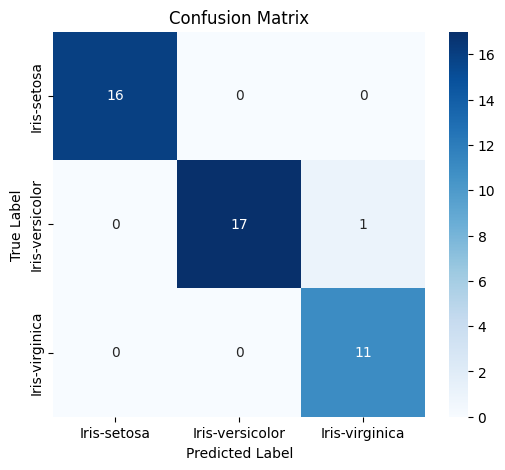

In [21]:
## Plotting confusion matrix
import matplotlib.pyplot as plt
import seaborn as sns

target_names = df['class'].unique()

plt.figure(figsize=(6,5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=target_names, yticklabels=target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
